In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

Sometimes mean and variance are not enough to describe a distribution. When we calculate variance, we square the deviations around the mean. In the case of large deviations, we do not know whether they are likely to be positive or negative. This is where the skewness and symmetry of a distribution come in. A distribution is symmetric if the parts on either side of the mean are mirror images of each other. For example, the normal distribution is symmetric. The normal distribution with mean  and standard deviation  is defined as

$$ f(x) = \\frac{1}{\\sigma \\sqrt{2 \\pi}} e^{-\\frac{(x - \\mu)^2}{2 \\sigma^2}} $$

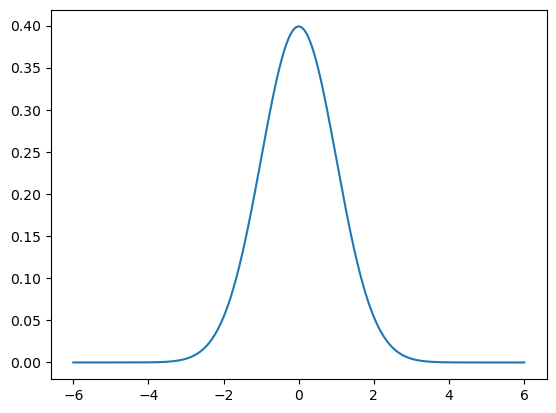

In [2]:
# Plot a normal distribution with mean = 0 and standard deviation = 2
xs = np.linspace(-6,6, 300)
normal = stats.norm.pdf(xs)
plt.plot(xs, normal);

Positively skewed unimodal (one mode) distributions have the property that mean > median > mode. Negatively skewed unimodal distributions are the reverse, with mean < median < mode

$$ S_K = \\frac{n}{(n-1)(n-2)} \\frac{\\sum_{i=1}^n (X_i - \\mu)^3}{\\sigma^3} $$

Where $n$ is the number of observations, $\\mu$ is the arithmetic mean, and $\\sigma$ is the standard deviation.

For unimodal distributions, a negative skew typically indicates that the tail is fatter on the left, while a positive skew indicates that the tail is fatter on the right.

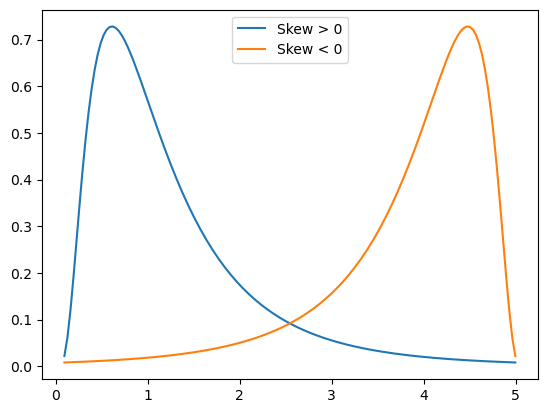

In [3]:
# Generate x-values for which we will plot the distribution
xs2 = np.linspace(stats.lognorm.ppf(0.01, .7, loc=-.1), stats.lognorm.ppf(0.99, .7, loc=-.1), 150)

# Negatively skewed distribution
lognormal = stats.lognorm.pdf(xs2, .7)
plt.plot(xs2, lognormal, label='Skew > 0')

# Positively skewed distribution
plt.plot(xs2, lognormal[::-1], label='Skew < 0')
plt.legend();

Skew: -0.9752853487898011
Mean: 0.0004590718413812826
Median: 0.0013213850233020352


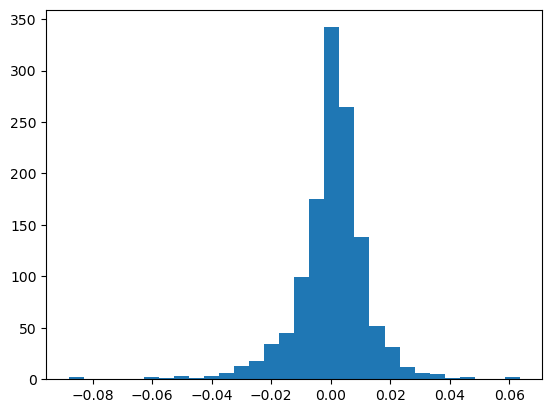

In [4]:
import pandas_datareader as pdr

data_spy = pdr.get_data_yahoo('SPY')

returns = data_spy["Open"].pct_change()[1:]

print('Skew:', stats.skew(returns))
print('Mean:', np.mean(returns))
print('Median:', np.median(returns))

plt.hist(returns, 30);

# Kurtosis

Kurtosis attempts to measure the shape of the deviation from the mean. Generally, it describes how peaked a distribution is compared the the normal distribution, called mesokurtic. All normal distributions, regardless of mean and variance, have a kurtosis of 3. A leptokurtic distribution (kurtosis > 3) is highly peaked and has fat tails, while a platykurtic distribution (kurtosis < 3) is broad. Sometimes, however, kurtosis in excess of the normal distribution (kurtosis - 3) is used, and this is the default in scipy. A leptokurtic distribution has more frequent large jumps away from the mean than a normal distribution does while a platykurtic distribution has fewer.


Excess kurtosis of leptokurtic distribution: 3.0
Excess kurtosis of mesokurtic distribution: 0.0
Excess kurtosis of platykurtic distribution: -0.5937628755982794


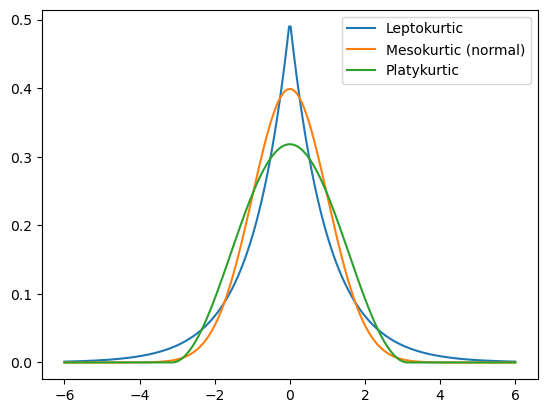

In [5]:
# Plot some example distributions
plt.plot(xs,stats.laplace.pdf(xs), label='Leptokurtic')
print('Excess kurtosis of leptokurtic distribution:', (stats.laplace.stats(moments='k')))
plt.plot(xs, normal, label='Mesokurtic (normal)')
print('Excess kurtosis of mesokurtic distribution:', (stats.norm.stats(moments='k')))
plt.plot(xs,stats.cosine.pdf(xs), label='Platykurtic')
print('Excess kurtosis of platykurtic distribution:', (stats.cosine.stats(moments='k')))
plt.legend();

Since above we were considering perfect, continuous distributions, this was the form that kurtosis took. However, for a set of samples drawn for the normal distribution, we would use the first definition, and (excess) kurtosis would only be approximately 0.

In [6]:
# We can use scipy to find the excess kurtosis of the S&P 500 returns from before.

print("Excess kurtosis of returns: ", stats.kurtosis(returns))

Excess kurtosis of returns:  7.334687085546156


# Other standardized moments

The first standardized moment is always 0 so only care about the 2-4
All of the standardized moments are dimensionless numbers which describe the distribution

in particular can be used to quantify how close to normal (having standardized moments $0, \\sigma, 0, \\sigma^2$) a distribution is

# Normality Testing Using Jarque-Bera

Jarque-Bera test is a common statistical test that compares whether sample data has skewness and kurtosis similar to a normal distribution

run it here on the S&P 500 returns to find the p-value for them coming from a normal distribution.

The Jarque Bera test's null hypothesis is that the data came from a normal distribution. Because of this it can err on the side of not catching a non-normal process if you have a low p-value. To be safe it can be good to increase your cutoff when using the test.

Remember to treat p-values as binary and not try to read into them or compare them. We'll use a cutoff of 0.05 for our p-value.

You might not know whether it's the null or alternative hypothesis that the tested data comes from a normal distribution. It is recommended that you use the ? notation plus online searching to find documentation on the test; plus it is often a good idea to calibrate a test by checking it on simulated data and making sure it gives the right answer

In [11]:
# sim to test
from statsmodels.stats.stattools import jarque_bera

N = 1000
M = 1000

pvalues = np.ndarray((N))

for i in range(N):
    # Draw M samples from a normal distribution
    X = np.random.normal(0, 1, M);
    _, pvalue, _, _ = jarque_bera(X)
    pvalues[i] = pvalue

# count number of pvalues below our default 0.05 cutoff
num_significant = len(pvalues[pvalues < 0.05])

print(float(num_significant) / N)

0.051


Great, if properly calibrated we should expect to be wrong $5\\%$  of the time at a 0.05 significance level, and this is pretty close. This means that the test is working as we expect.

In [12]:
_, pvalue, _, _ = jarque_bera(returns)

if pvalue > 0.05:
    print('The returns are likely normal.')
else:
    print('The returns are likely not normal.')

The returns are likely not normal.
